### <span style="color:red">Lorenzo Albano, 967738</span>

# <span style="color:red"> ESERCIZIO 1.1:</span> Test del generatore di numeri pseudo-casuali: media a blocchi

## <span style="color:blue"> GRAFICO A) </span> Media delle medie di un numero crescente di blocchi, con relativo errore
Si estraggono con il generatore di numeri pseudo-casuali (RNG) $100.000$ numeri uniformemente tra $0$ ed $1$. Questi vengono divisi in $100$ blocchi da $1000$ numeri ciascuno. Si calcola la media $\langle r \rangle_i$ su ogni blocco. Nel grafico seguente vengono riportate le medie delle somme degli $\langle r \rangle_i$ per numero crescente di blocchi $\big(\sum_{i=1}^1 \langle r \rangle_i$, $\frac{1}{2}\sum_{i=1}^2 \langle r \rangle_i$, $\frac{1}{3}\sum_{i=1}^3 \langle r \rangle_i$... ecc.$\big)$, con relativa incertezza statistica (deviazione standard della media). Per una comprensione immediata del grafico lo si centra sullo zero $\big($valore atteso sarebbe $\langle r \rangle = \int_0^1 r dr = \frac 1 2\big)$.

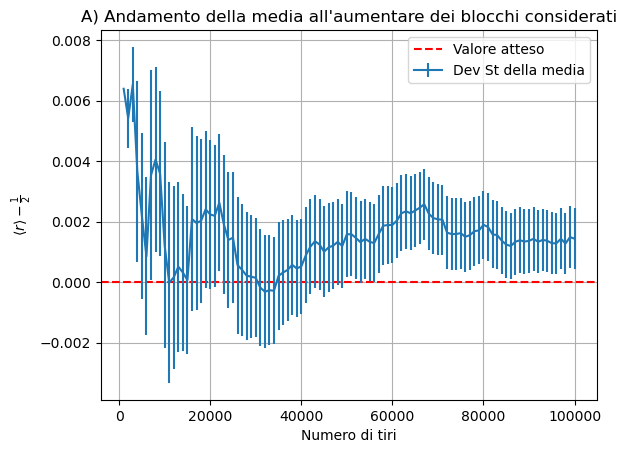

In [1]:
import matplotlib.pyplot as plt
import numpy as np

# Vettore di numeri ordinati da 1 a 100 (infatti il primo blocco contiene già 1000 numeri, non ha senso partire da 0!)
x = np.arange(1, 101) 

# Carica i dati dal file
data = np.loadtxt('1.medie_medie.out')

x*=1000  # Tiri per blocco

# Disegna una retta orizzontale sul valore atteso
plt.axhline(y=0, color='r', linestyle='--', label="Valore atteso")


plt.errorbar(x,data[:,0]-0.5,yerr=data[:,1], label="Dev St della media")
plt.xlabel('Numero di tiri')
plt.ylabel(r'$\langle r \rangle- \frac{1}{2}$')

plt.title("A) Andamento della media all'aumentare dei blocchi considerati")
plt.grid(True)

plt.legend()
plt.show()

## <span style="color:green"> GRAFICO B) </span>Varianza media dei blocchi, con relativo errore
Si riconsiderano i $100.000$ numeri estratti in precedenza in $100$ blocchi da $1000$. Si calcola la varianza di ogni blocco e, posta questa come nuova osservabile $\sigma_i^2$, viene posta nel grafico la media delle varianze sommate per numero crescente di blocchi $\big(\sum_{i=1}^1 \sigma_i^2$, $\frac{1}{2}\sum_{i=1}^2 \sigma_i^2$, $\frac{1}{3}\sum_{i=1}^3 \sigma_i^2$... ecc.$\big)$, con relativa incertezza statistica (deviazione standard della media). Per una comprensione immediata del grafico lo si centra sullo zero $\big($valore atteso sarebbe $\sigma^2 = \int_0^1 (r-\frac{1}{2})^2 dr = \frac{1}{12}\big)$.

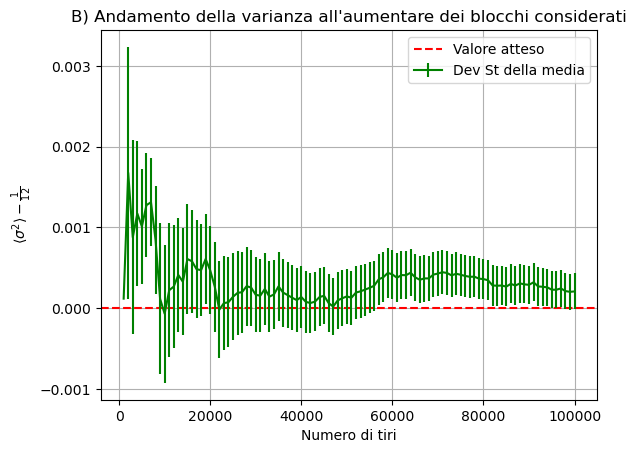

In [2]:
# Vettore di numeri ordinati da 1 a 100 (infatti il primo blocco contiene già 1000 numeri, non ha senso partire da 0!)
x = np.arange(1, 101) 

# Carica i dati dal file
data = np.loadtxt('1.ave_sigma_medie.out')

x*=1000  # Tiri per blocco

# Disegna una retta orizzontale sul valore atteso
plt.axhline(y=0, color='r', linestyle='--', label="Valore atteso")



plt.errorbar(x,data[:,0]-1./12.,yerr=data[:,1], color='green', label="Dev St della media")
plt.xlabel('Numero di tiri')
plt.ylabel(r'$\langle\sigma^2\rangle-\frac{1}{12}$')

plt.title("B) Andamento della varianza all'aumentare dei blocchi considerati")
plt.grid(True)

plt.legend()
plt.show()

## <span style="color:orange"> GRAFICI C e D) </span>Test del chi quadro $\chi^2$
Si vuole testare quanto le estrazioni del RNG appaiano casuali: si estraggono $n=10.000$ numeri uniformemente distribuiti tra $0$ ed $1$, raggruppati in $100$ blocchi da $100$. Per ogni blocco si calcola il chi quadro $\chi_j^2$:
$$\chi_j^2 = \sum_{i=1}^M \frac{\left( n_i - n/M \right)^2}{n/M}$$
dove $M=100$ sono i sottointervalli in cui si è diviso [0,1] ed $n_i$ il numero di conteggi per ogni sottointervallo $i$. Il valore atteso è $\chi_j^2 = 100$, ovvero il numero di sottointervalli. Si riporta graficamente la distribuzione dei valori di chi quadro per ogni blocco tramite uno scatter plot e tramite un istogramma di $10$ bins.

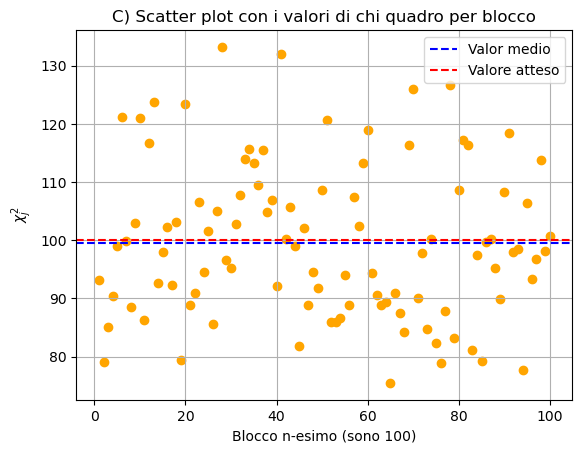

In [4]:
# Vettore di numeri ordinati da 1 a 100 (numerazione progressiva dei blocchi)
x = np.arange(1, 101) 

# Carica i dati dal file
data = np.loadtxt('1.chi_quadro.out')

plt.scatter(x, data, color='orange')
plt.xlabel('Blocco n-esimo (sono 100)')
plt.ylabel(r'$\chi_j^2$')

y_mean = data.mean()
plt.axhline(y=y_mean, color='b', linestyle='--', label="Valor medio")
plt.axhline(y=100, color='r', linestyle='--', label="Valore atteso")

plt.title('C) Scatter plot con i valori di chi quadro per blocco')

plt.grid(True)

plt.legend()
plt.show()

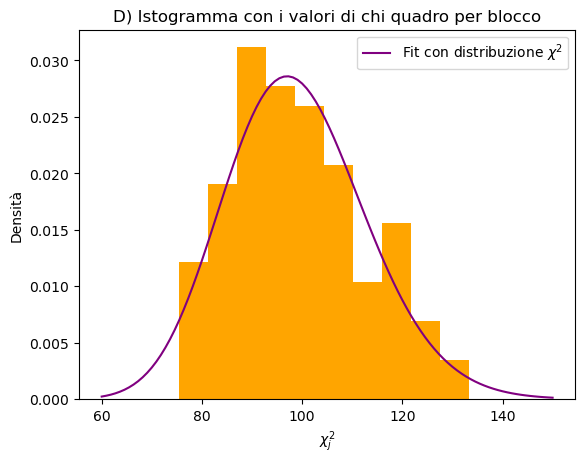

In [5]:
from scipy.stats import chi2

# Carica i dati dal file
data = np.loadtxt('1.chi_quadro.out')

# Creazione dell'istogramma
n_bins = 10
fig, ax = plt.subplots()
n, bins, patches = ax.hist(data, bins=n_bins, color='orange', density=True)

# Fit con la distribuzione del chi quadro
df = len(data) - 1  # Gradi di libertà
x = np.linspace(60, 150, 100)  # Valori di chi^2 per il fit
pdf = chi2.pdf(x, df)  # PDF della distribuzione del chi^2

# Sovrapposizione della curva di fit all'istogramma
ax.plot(x, pdf, color='purple', label='Fit con distribuzione $\chi^2$')

plt.xlabel(r'$\chi_j^2$')
plt.ylabel('Densità')
plt.title('D) Istogramma con i valori di chi quadro per blocco')
plt.legend()
plt.show()
